In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [3]:
df = pd.read_csv("resume_data.csv", encoding="latin-1")

In [4]:
df = df[["resume_text", "class"]]

In [ ]:
df.head()

In [7]:
df["class"] = df["class"].map({"not_flagged": 0, "flagged": 1})

In [8]:
stop_words_list = stopwords.words('english')

In [9]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\d', '', text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [word for word in words if not word in stop_words_list]
    words = [re.sub(r'(.)\1{1,}', r'\1\1', word) for word in words]
    words = [word.strip() for word in words if len(word.strip()) > 1]
    
    text = " ".join(words)
    return text

In [10]:
df["clean_text"] = df["resume_text"].apply(preprocess_text)

In [11]:
X = df["clean_text"]
y = df["class"]

In [12]:
cv = CountVectorizer()
X_vectorized = cv.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=4242)

In [19]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [20]:
y_pred = mnb.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.84

<AxesSubplot: >

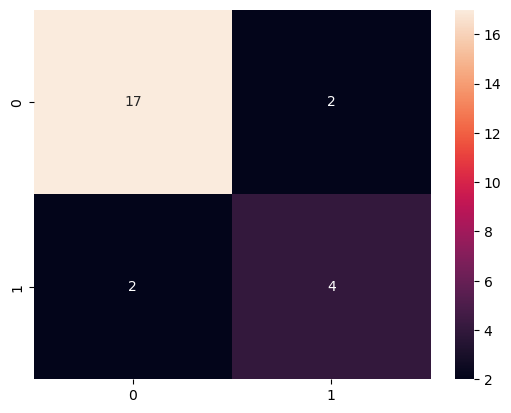

In [23]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.67      0.67      0.67         6

    accuracy                           0.84        25
   macro avg       0.78      0.78      0.78        25
weighted avg       0.84      0.84      0.84        25

